In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV

In [2]:
#pathes
test_path = "test_x.csv"
train_path = "train.csv"

In [3]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
train_data.columns

Index(['city', 'floor', 'id', 'lat', 'lng', 'osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_city_closest_dist',
       'osm_city_nearest_name', 'osm_city_nearest_population',
       'osm_crossing_closest_dist', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in

In [4]:
#code to find target column
for c1 in train_data.columns.values:
    if c1 not in test_data:
        print(c1)

per_square_meter_price


In [5]:
target = 'per_square_meter_price'

In [6]:
from sklearn.model_selection import train_test_split
#train_data = train_data.drop_duplicates()
train, val = train_test_split(train_data, test_size = 0.2, shuffle = True)

## Data Analisis

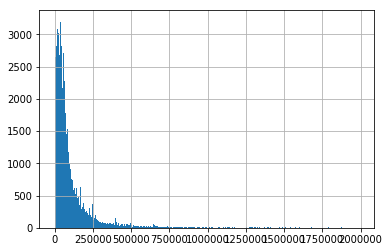

In [7]:
train[target].hist(bins = 1000)
#train['osm_city_nearest_population'].hist(bins = 20)

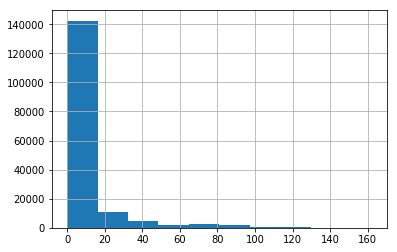

In [8]:
train['osm_catering_points_in_0.005'].hist()

In [9]:
train[train[target] > 250000].shape[0]/train.shape[0]

0.09081057519418329

In [10]:
print(train.lat.isna().sum(), train.lng.isna().sum())
print(train[target].isna().sum())

0 0
0


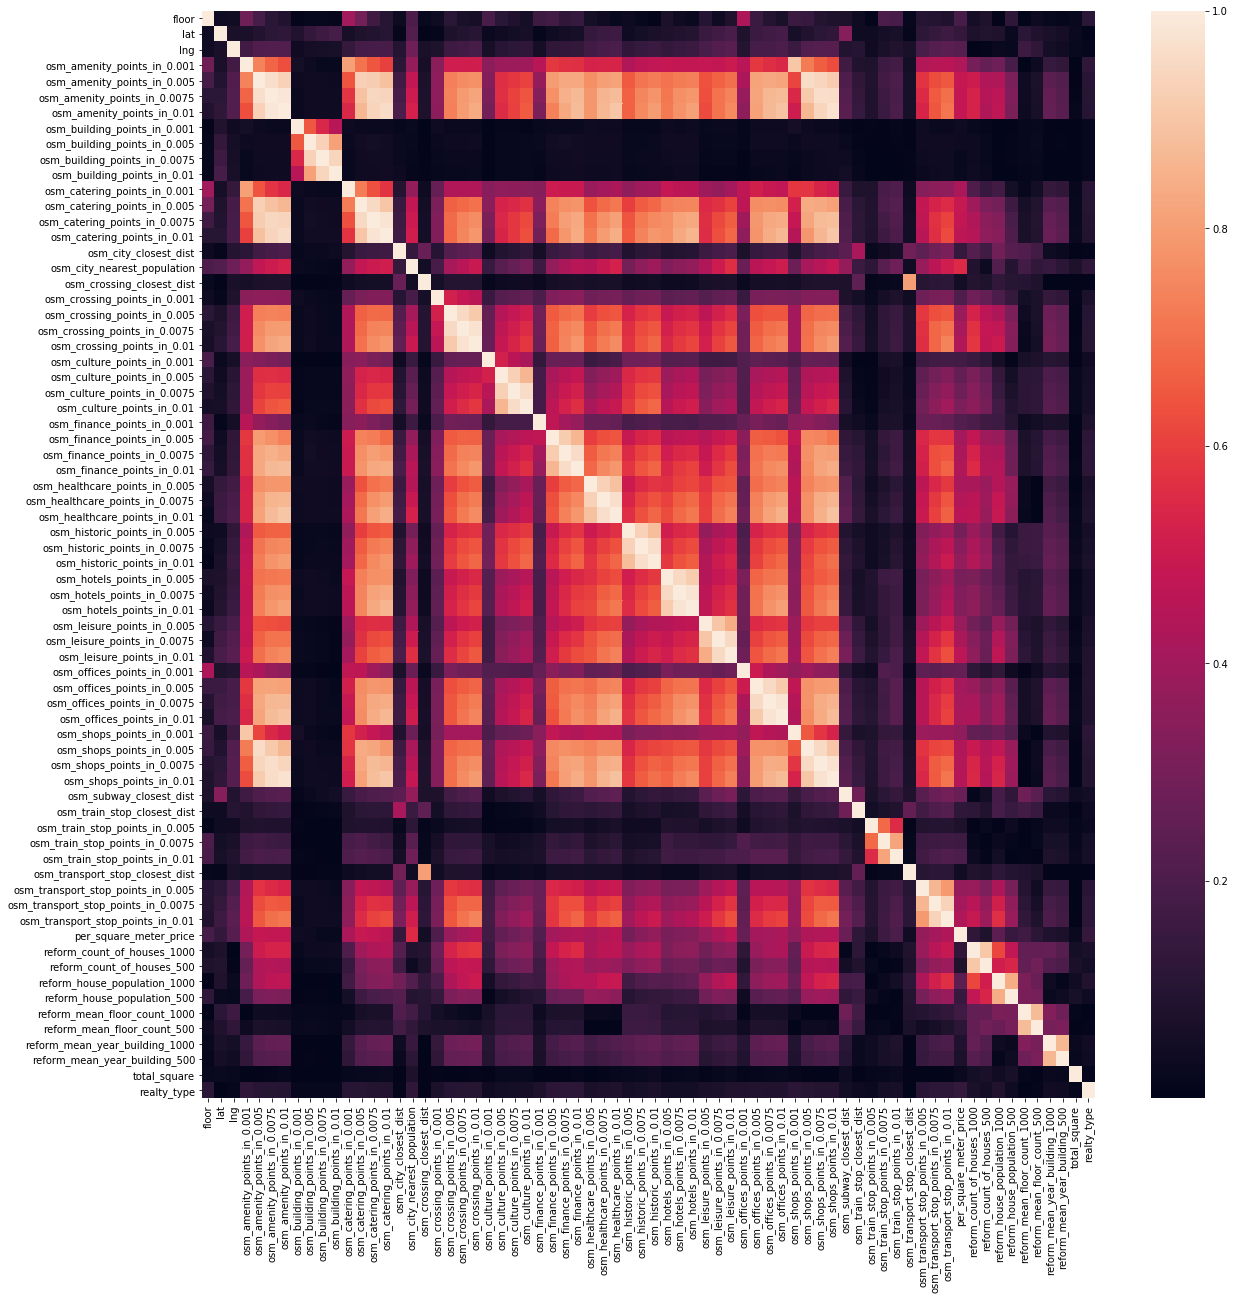

In [11]:
import seaborn as sns
params = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(train.corr().abs())
plt.rcParams["figure.figsize"] = params

In [12]:
corr = train.corr().abs()
#print(corr)
sorted_corr = corr[target].sort_values(ascending=False)
sorted_corr.head(63).index

Index(['per_square_meter_price', 'osm_city_nearest_population',
       'osm_catering_points_in_0.005', 'osm_amenity_points_in_0.005',
       'osm_amenity_points_in_0.01', 'osm_amenity_points_in_0.0075',
       'osm_catering_points_in_0.0075', 'osm_catering_points_in_0.01',
       'osm_leisure_points_in_0.01', 'osm_healthcare_points_in_0.01',
       'osm_shops_points_in_0.01', 'osm_healthcare_points_in_0.0075',
       'osm_shops_points_in_0.0075', 'osm_shops_points_in_0.005',
       'osm_amenity_points_in_0.001', 'osm_crossing_points_in_0.01',
       'osm_transport_stop_points_in_0.01', 'osm_finance_points_in_0.01',
       'osm_catering_points_in_0.001', 'osm_offices_points_in_0.01',
       'osm_leisure_points_in_0.0075', 'osm_finance_points_in_0.0075',
       'osm_healthcare_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_offices_points_in_0.0075', 'osm_offices_points_in_0.005',
       'osm_finance_points_in_0.005', 'osm_transport_stop_points_in_0.0075',
       'osm_cros

In [13]:
train.osm_city_nearest_population

5841        168997.0
103144    12630289.0
150494     1468833.0
151378      277796.0
96665       127255.0
             ...    
179971      120184.0
115283      619492.0
182035       51358.0
69556       632723.0
34760       220947.0
Name: osm_city_nearest_population, Length: 165179, dtype: float64

In [14]:
small_train = train[train[target] < 250000]

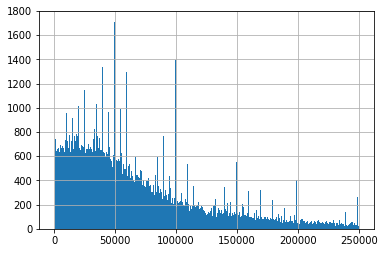

In [15]:
small_train[target].hist(bins = 500)

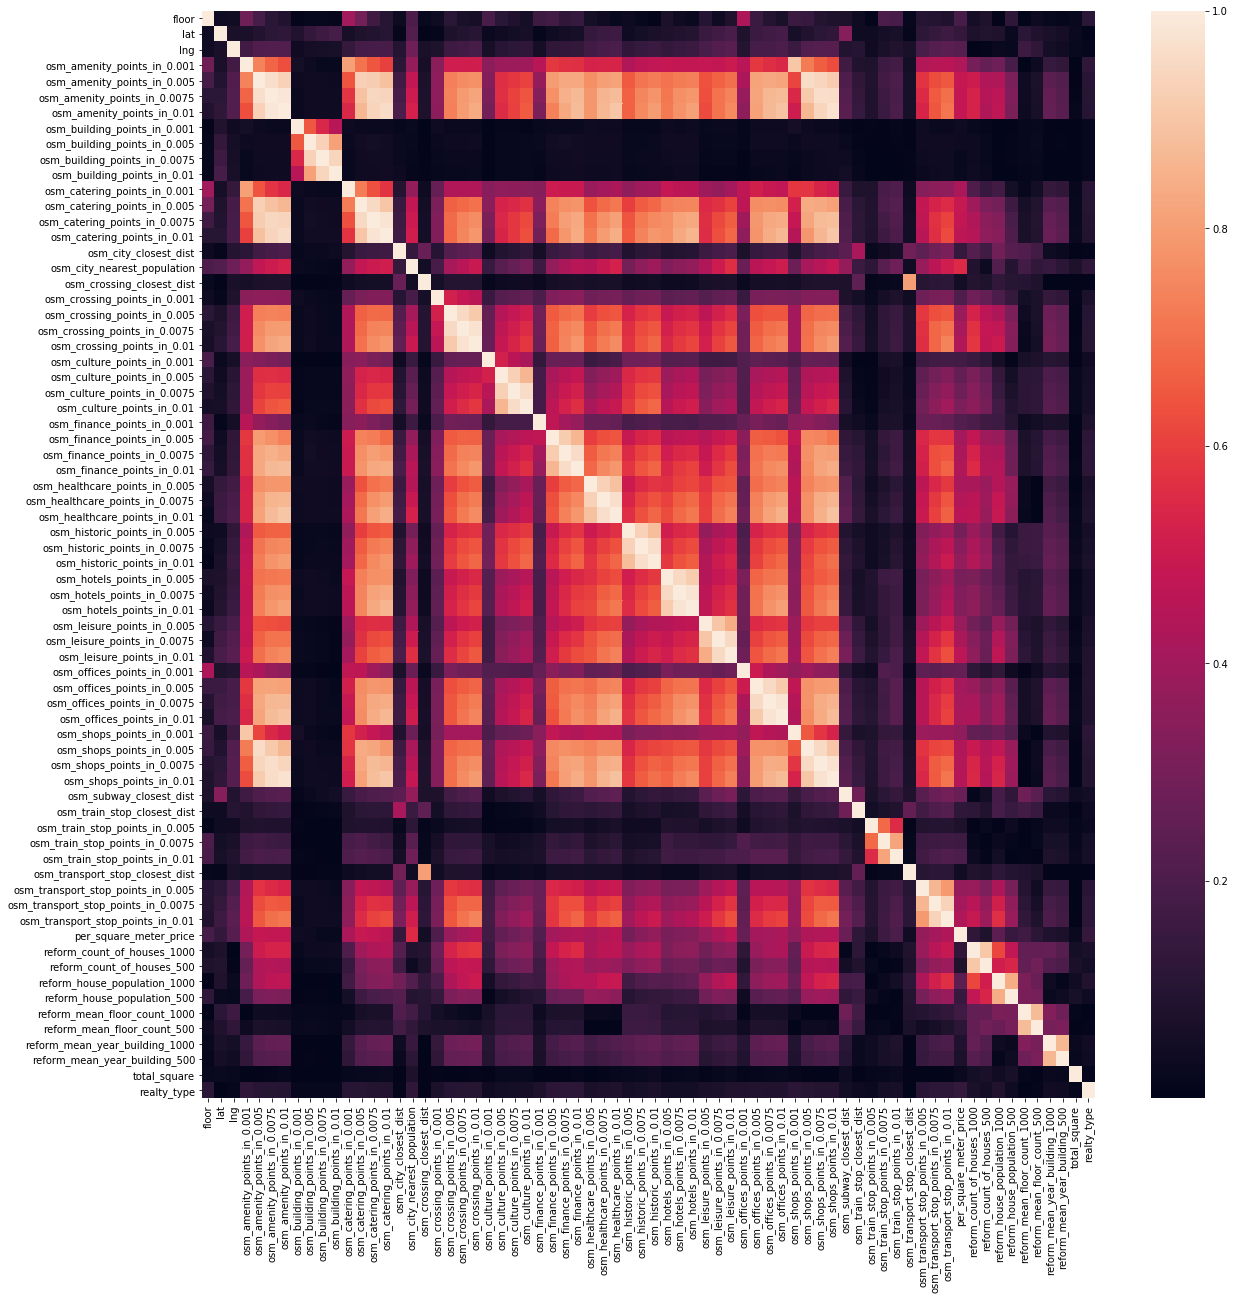

In [16]:
params = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(train.corr().abs())
plt.rcParams["figure.figsize"] = params

In [17]:
from scipy.special import boxcox, inv_boxcox
box = 2.5
def minmax(data, column):
    data[column] = (data[column] - np.min(data[column]))/(np.max(data[column]) - np.min(data[column]))
def dropna(data, column):
    data[column].fillna(data[column].mean(), inplace = True)
def target_scaling_df(data):
    data[target] = np.log(data[target])
def target_scaling_df_r(data):
    return np.log(data[target])
def target_scaling(data):
    return np.log(data)
def target_unscaling(data):
    return np.exp(data)


203408    12.429163
198395    12.429070
48482     12.429015
179421    12.428806
111635    12.428759
            ...    
94943      5.985894
159168     5.983096
42589      5.983096
188031     5.979769
72652      5.965147
Name: per_square_meter_price, Length: 150179, dtype: float64


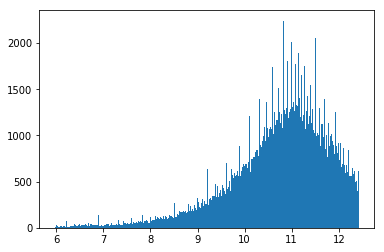

In [18]:
scaled_train = target_scaling_df_r(small_train)
print(scaled_train.sort_values(ascending=False))
plt.hist(scaled_train, bins = 300)
plt.show()

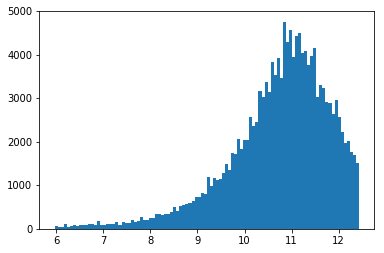

In [19]:
plt.hist(scaled_train, bins = 100)
plt.show()

## Final features

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
def make_features(data,  test = False, dop = None, scaler = None):
    new_data = data.copy()
    features = ['osm_city_nearest_population', 'osm_catering_points_in_0.005', 'osm_amenity_points_in_0.005',
       'osm_amenity_points_in_0.01']
    if not test:
        pass
        #new_data = new_data.dropna()   
        #target_scaling_df(new_data)
        #new_data[target] = target_scaling(new_data[target])
        #minmax(new_data, target)
        #new_data.drop(new_data[new_data[target] > 250000].index, inplace = True)
    for feature in features:
        if new_data[feature].isna().sum() > 0:
            print("column " + feature + str(new_data[feature].isna().sum()))
            features.remove(feature)
    if(scaler is None):
        scaler = MinMaxScaler()
        new_data[features + [target]] = scaler.fit_transform(new_data[features + [target]])
    else if not test:
        values= new_data[target].values
        #new_data[target] = np.zeros(new_data.shape[0])
        new_data[features + [target]] = scaler.transform(new_data[features + [target]])
    else:
        new_data[target] = np.zeros(new_data.shape[0])
        new_data[features + [target]] = scaler.transform(new_data[features + [target]])
        
    
    '''for feature in features:
        new_data[feature] = target_scaling(new_data[feature])
        new_data[feature] = (new_data[feature] - np.min(new_data[feature]))/(np.max(new_data[feature]) - np.min(new_data[feature]))
        #minmax(new_data, feature)
        #new_data[feature].fillna(new_data[feature].mean(), inplace = True)
        if new_data[feature].isna().sum() == 0:
            print("column " + feature + str(new_data[feature].isna().sum()))
            final_features.append(feature)'''
            
    plt.hist(new_data[target], bins = 100)
    plt.show()
     # очень небольшой процент nan
    return new_data, features, scaler
def make_selection(data, test = False, gr = False, dop = None, scaler = None):
    new_data, features, scaler = make_features(data, test = test, dop = dop, scaler = scaler)
    if not test:
        if gr:
            features_y = features + [target]
            sns.heatmap(new_data[features_y].corr().abs(), vmin=0, vmax=0.6, cmap="BuPu")
            print(new_data[features_y].corr()[target])
        return new_data[features], new_data[target], scaler
    else:
        return new_data[features]
''', 'osm_amenity_points_in_0.0075',
       'osm_catering_points_in_0.0075', 'osm_catering_points_in_0.01',
       'osm_leisure_points_in_0.01', 'osm_healthcare_points_in_0.01',
       'osm_shops_points_in_0.01', 'osm_amenity_points_in_0.001',
       'osm_healthcare_points_in_0.0075', 'osm_shops_points_in_0.0075'] '''

SyntaxError: invalid syntax (<ipython-input-51-e58d0d28a8fb>, line 19)

## Learning

column osm_city_nearest_population33


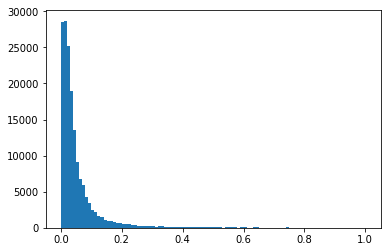

osm_catering_points_in_0.005    0.492210
osm_amenity_points_in_0.005     0.485931
osm_amenity_points_in_0.01      0.480139
per_square_meter_price          1.000000
Name: per_square_meter_price, dtype: float64


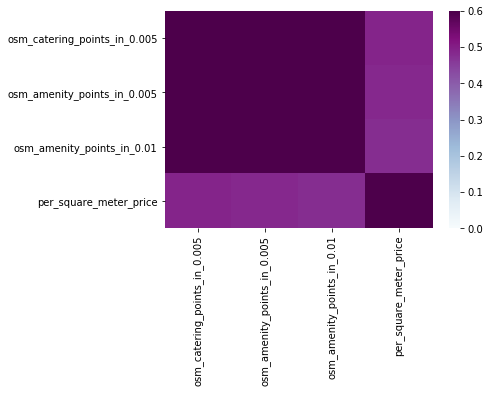

In [22]:
train_X, train_y, scaler = make_selection(train, gr = True)

In [23]:
train_X.describe()

,osm_catering_points_in_0.005,osm_amenity_points_in_0.005,osm_amenity_points_in_0.01
count,165179.000000,165179.000000,165179.000000
mean,0.053620,0.088746,0.094920
std,0.107332,0.115826,0.121757
min,0.000000,0.000000,0.000000
25%,0.000000,0.015419,0.020115
50%,0.012346,0.048458,0.055316
75%,0.049383,0.112335,0.117816
max,1.000000,1.000000,1.000000


column osm_city_nearest_population2


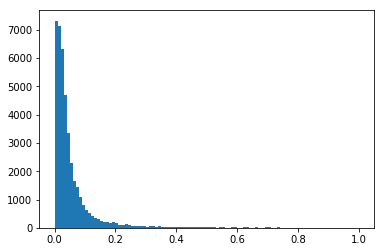

In [24]:
val_X, val_y, scaler = make_selection(val, dop = train, scaler = scaler)

In [25]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [26]:
model = SGDRegressor()
params = {'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
          'penalty': ['l2', 'l1', 'elasticnet'],
          'l1_ratio': range(0, 1, 10),
         'max_iter':range(500, 3000, 10)}
model_learned = RandomizedSearchCV(model, params)
model_learned.fit(train_X, train_y)
model_learned.best_params_

{'penalty': 'elasticnet',
 'max_iter': 2480,
 'loss': 'squared_error',
 'l1_ratio': 0}

In [27]:
model_learned.score(val_X, val_y)

0.27017428599152804

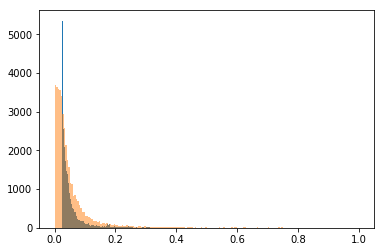

In [42]:
model = SGDRegressor(penalty = 'l1', max_iter = 1030, loss = 'squared_error', l1_ratio = 0)
model.fit(train_X, train_y)
#model.fit(train_X, train_y)
pred_scaled = model_learned.predict(val_X)
pred = target_unscaling(pred_scaled)
#val_y_scaled = target_scaling(val_y)
plt.hist(pred_scaled, bins = 200)
plt.hist(val_y, alpha = 0.5, bins = 200)
plt.show()

In [44]:
temp = val_X.copy()
temp[target] = pred
#print(temp.values)
prediction = scaler.inverse_transform(temp)
#pred

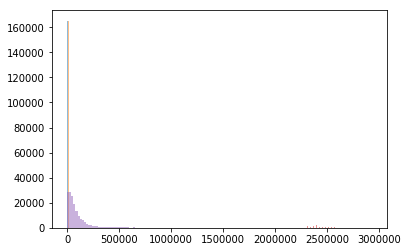

In [45]:
plt.hist(np.concatenate([prediction]*4), alpha = 0.5, bins = 100)
plt.hist(train[target],alpha = 0.5,  bins = 100)
plt.show()

In [46]:
mape = mean_absolute_percentage_error(pred_scaled, val_y)
print(mape)

0.701073497754335


(array([5.9368e+04, 3.1884e+04, 2.0060e+04, 1.2312e+04, 8.3840e+03,
        6.0960e+03, 4.2840e+03, 3.1840e+03, 2.5680e+03, 2.1920e+03,
        1.7840e+03, 1.4040e+03, 1.1880e+03, 1.0000e+03, 8.2800e+02,
        5.9200e+02, 5.5200e+02, 6.5200e+02, 1.1200e+03, 1.3320e+03,
        3.6800e+02, 3.9600e+02, 3.2800e+02, 3.0400e+02, 2.3200e+02,
        3.2000e+02, 2.8400e+02, 4.0000e+02, 3.2000e+02, 2.0800e+02,
        1.1600e+02, 1.3200e+02, 8.0000e+01, 1.0400e+02, 9.6000e+01,
        1.4000e+02, 8.4000e+01, 1.9600e+02, 1.6400e+02, 2.4000e+01,
        5.6000e+01, 4.0000e+00, 4.0000e+00, 8.0000e+00, 4.0000e+00,
        4.0000e+00, 4.0000e+00, 8.0000e+00, 0.0000e+00, 8.0000e+00]),
 array([1.02497224, 1.03390222, 1.0428322 , 1.05176218, 1.06069216,
        1.06962214, 1.07855212, 1.0874821 , 1.09641208, 1.10534206,
        1.11427204, 1.12320202, 1.13213201, 1.14106199, 1.14999197,
        1.15892195, 1.16785193, 1.17678191, 1.18571189, 1.19464187,
        1.20357185, 1.21250183, 1.22143181, 1.

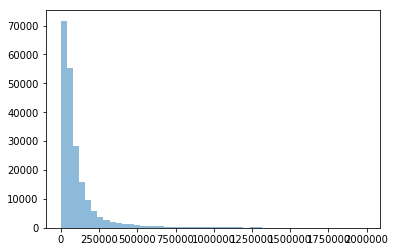

In [47]:
plt.hist(train_data[target], bins = 50, alpha = 0.5)
plt.hist(np.concatenate([pred]*4), bins = 50, alpha = 0.5)

## Submission

In [48]:
version = 4

In [49]:
test_data = pd.read_csv(test_path)
test_data.head()

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type
0,Москва,1.0,COL_164098,55.700000,37.752365,5,21,51,89,0,...,1048.0,8.510989,8.791667,1970.950549,1971.250000,Москва,4863.0,S5484,2020-05-24,100
1,Октябрьский,NaN,COL_70629,54.489840,53.490696,0,1,7,21,0,...,136.0,4.937500,3.173913,1973.046875,1965.565217,Башкортостан,26.0,S12273,2020-02-23,100
2,Пермь,1.0,COL_132045,57.969273,56.152996,1,21,37,50,0,...,395.0,7.118644,11.071429,1973.639344,1980.400000,Пермский край,242.0,S34019,2020-04-26,100
3,Балашиха,1.0,COL_16510,55.785270,37.853317,0,5,39,49,0,...,NaN,NaN,NaN,NaN,NaN,Московская область,91.9,S21668,2020-01-19,10
4,"Одинцовский городской округ, с. Аксиньино",3.0,COL_141915,55.738186,36.981342,2,8,8,9,0,...,NaN,NaN,NaN,NaN,NaN,Московская область,1500.0,S2158,2020-05-03,110


In [50]:
final_test_X = make_selection(test_data, test = True, dop = train_data)
final_test_X

column osm_city_nearest_population19


KeyError: "['per_square_meter_price'] not in index"

In [ ]:
final_pred = model_learned.predict(final_test_X)
final_pred = target_unscaling(final_pred)

In [ ]:
plt.hist(train_data[target], bins = 20)
plt.hist(np.concatenate([final_pred]*4), bins = 20, alpha = 0.5)

In [ ]:
result = pd.DataFrame({target: final_pred, 'id': test_data.index})
result.set_index('id', inplace = True)
result.head()

In [ ]:
import inspect
code = inspect.getsource(make_features)

In [ ]:
config = pd.DataFrame({'v': [version], 
                       'mape': [mean_absolute_percentage_error(pred, val_y)],
                      'code': code})

In [ ]:
import os 
dir = 'submission' + str(version)
os.makedirs(dir, exist_ok=True)  
result.to_csv(dir + '/submission' + str(version) + ".csv") 
config.to_csv(dir + '/config' + str(version) + '.csv')